In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
file_path="C:\\Users\\sony\\ DATA SCIENCE  NARESH IT\\Visadataset.csv"
visa_df=pd.read_csv(file_path)
visa_df

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified
...,...,...,...,...,...,...,...,...,...,...,...,...
25475,EZYV25476,Asia,Bachelor's,Y,Y,2601,2008,South,77092.5700,Year,Y,Certified
25476,EZYV25477,Asia,High School,Y,N,3274,2006,Northeast,279174.7900,Year,Y,Certified
25477,EZYV25478,Asia,Master's,Y,N,1121,1910,South,146298.8500,Year,N,Certified
25478,EZYV25479,Asia,Master's,Y,Y,1918,1887,West,86154.7700,Year,Y,Certified


In [3]:
q1=np.quantile(visa_df['prevailing_wage'],0.25)
q2=np.quantile(visa_df['prevailing_wage'],0.50)
q3=np.quantile(visa_df['prevailing_wage'],0.75)
IQR=q3-q1
ub=q3+1.5*IQR
lb=q1-1.5*IQR
con1=visa_df['prevailing_wage']>ub
con2=visa_df['prevailing_wage']<lb
################################################
outliers=visa_df['prevailing_wage'][con1|con2] 
##############################################
len(outliers)        

427

In [4]:
new_data=[]
for i in visa_df['prevailing_wage']:
    if i>ub or i<lb:
        new_data.append(visa_df['prevailing_wage'].median)
    else:
        new_data.append(i)
        
len(new_data) 

# we are iterate through pe_wage data
# if any datapoint >ub or <lb means it is a outliers so in that position 
#                                 we are keeping median value of column

# otherwise we are keeping the same value

25480

### np.where

In [5]:
dict1={'col1':[1,2,3,4],
     'col2':['A','B','C','D']}
data=pd.DataFrame(dict1)
data

,col1,col2
0,1,A
1,2,B
2,3,C
3,4,D


In [6]:
# I want to impute with a value 100 in the col1
# which are having value >2
# col1 col2
#  1    A
#  2    B
# 100   C
# 100   D

In [ ]:
- np.where will take 3 argument values

- Condition : con=data['col1']>2
    
- If that condition is True will provide the value:100
    
- If that condition is False will keep the same value: data['col1']
    
- np.where(<condition>,<True_value>,<False_value>)    

In [7]:
con=data['col1']>2
np.where(con,100,data['col1'])

# binary condition 
# True False
# if else

array([  1,   2, 100, 100], dtype=int64)

In [8]:
data

,col1,col2
0,1,A
1,2,B
2,3,C
3,4,D


# Case-1

## Create a new column

In [9]:
data['new_col']=[100,200,300,400]
data

,col1,col2,new_col
0,1,A,100
1,2,B,200
2,3,C,300
3,4,D,400


In [12]:
con=data['col1']>2
data['col3']=np.where(con,100,data['col1'])
data


,col1,col2,new_col,col3
0,1,A,100,1
1,2,B,200,2
2,3,C,300,100
3,4,D,400,100


## Case-2 :
## Overwrite the value

In [14]:
con=data['col1']>2
data['col1']=np.where(con,100,data['col1'])
data


,col1,col2,new_col,col3
0,1,A,100,1
1,2,B,200,2
2,100,C,300,100
3,100,D,400,100


In [17]:
# Drop unwanted column

data.drop(['new_col','col3'],
          axis=1,
          inplace=True)

In [18]:
data

,col1,col2
0,1,A
1,2,B
2,100,C
3,100,D


## Task

### Implement the same thing for prevailaing wage

In [19]:
# step-1: write the condition
# step-2: True value: Median value
# step-3: False value: same column values
# step-4: implment np.where(<con1>,<True_value>,<False_value>)
# step-5: overwrite in the same column name
# step-6: Draw the boxplot
# step-7: Draw the boxplot for p_wage
# step-8: Draw the histrogram p_wage

In [22]:
con1=visa_df['prevailing_wage']>ub
con2=visa_df['prevailing_wage']<lb
con=con1|con2
wage_median=visa_df['prevailing_wage'].median()
visa_df['prevailing_wage']=np.where(con,
                                    wage_median,
                                    visa_df['prevailing_wage'])

{'whiskers': [<matplotlib.lines.Line2D at 0x1a804652700>,
 'caps': [<matplotlib.lines.Line2D at 0x1a804652d60>,
 'boxes': [<matplotlib.lines.Line2D at 0x1a804652430>],
 'medians': [<matplotlib.lines.Line2D at 0x1a804669280>],
 'fliers': [<matplotlib.lines.Line2D at 0x1a804669550>],
 'means': []}

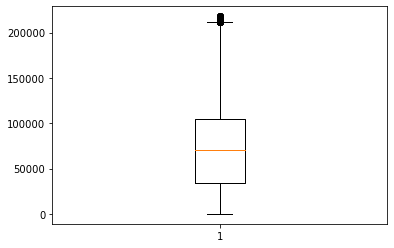

In [23]:
plt.boxplot(visa_df['prevailing_wage'])